# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек.

Выполнила студентка группы 9383 Лысова Александра. Вариант 98.

# Цель работы:

  Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.
    

# Основные теоретические положения:

### 1. Возведение числа в степень. Бинарный метод и метод множителей.

Необходимо вычислить $x^n$, где $n \in \mathbb{N}$ и количество операций для этого действия. Для этого есть несколько методов, рассмотрим два из них: *бинарный метод* и *метод множителей*.
 
**Бинарный метод:**

В бинарном методе используется двоичная запись числа, которая после перевода интерпретируется в буквенный вид, где "0" это "К", а "1" - "КУ". Буквы "К" и "У" обозначают собой одно из возможных действий: "К" - "умножение числа на само себя", "У" - "умножение числа на начальное(х)". Таким образом получается послудовательность действий, выполнил которую, будет получено исходное число в заданной степени.

Количество операций для бинарного метода считается так: $\lambda(n) + \nu(n) - 1$, где $\lambda(n) = \lfloor \log_2(n) \rfloor;$  $\nu(n) = \left\{\begin{array}\\
                                  \nu(\lfloor n/2 \rfloor) + n mod 2 & \mbox{if } \ n \neq 1 \\
                                  1 & \mbox{else. }
                   \end{array}
            \right.$

**Метод множителей:**

Метод множителей базируется на бинарном методе. Если число n не простое, то его можно разложить на множители, пусть $n = i * j,$ причем i - наименьший простой множитель n. Если можно число $x^i$ представить с помощью бинарного метода за $k$ операций, а $x^j$ - за m операций, то $x^n = x^{i+j}$ за $k + m$ операций.

После чего можно сравнить количество операций, необходимых в каждом методе. Зачастую результаты от двух методов для одного показателя разнятся, в таком случае один из методов будет оптимальнее.


### 2. Алгоритм Яо для вычисления приближенных аддитивных цепочек.

*Аддитивная цепочка* - последовательность $m + 1$ чисел, где каждый элемент это сумма двух любых предыдущих ($m \in \mathbb{N}$).

>$1 = a_0, a_1, ... , a_m = n$, где $a_i = a_j + a_k,$  $k \leq j < i$,      $\forall i = 1,...,m.$

Длина аддитивной цепочки обозначается: $l(n) = m$

Для Бинарного метода: $l(n) \leq \lambda(n) + \nu(n) - 1$

Для Метода Множителей: $l(n*m) \leq l(n) + l(m)$ 

**Алгоритм Яо:**

Это алгоритм построения аддитивной цепочки, который не гарантирует ее минимальность.

Выберем $n, k \geq 2$, тогда $n$ можно представить как $\sum\limits_{i=0}^j(a_i * 2^{i*k})$, где $a_i \neq 0$.

Функция $d(z) = \sum\limits_{i}2^{i*k}$, причем $\forall i: a_i = z$. 

Такая аддитивная цепочка будет начинаться с последовательности степеней двойки: $Y_k(n) = 1, 2, 4,..., 2^{\lambda(n)}$, далее необходимо вычислить все $d(z)$: $\forall z \in \{1,2,3,...,2^k-1\}, d(z) \neq 0$

Теперь $n$можно представить в виде $\sum\limits_{z=1}^{2^k-1}(z*d(z))$, грубо говоря происходит перевод в систему счисления с основанием $2^k$, это и будет дописано в аддитивную цепочку по алгоритму Яо.


### 3. Алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа.

**Звездная цепочка** - это аддитивная цепочка, включающая только звездные шаги.

$i$ шаг в аддитивной цепочке называется **звездным шагом**, когда одно из двух слагаемых точно равно числу на $i-1$ шаге.

> $a_i = a_{i-1} + a_k, k = 0,...,i-1$

**Вектор индексов:**

Пусть $\{ai\}$ - звездная цепочка, т.ч. $1=a_1, a_2, a_3,..., a_m=n$, получается, что длина: $l^*(n) = m-1$.

Тогда вектор индексов будет $ \{r_1, r_2, ..., r_{m-1}\}$, т.ч. $r_i = \{ x: 1 \leq x \leq i \} \Rightarrow a_i = a_{i-1} + a_{r_{i-1}}, 2 \leq i \leq m-1$

**Алгоритм дробления вектора индексов:** 

Пусть $\{a_i\}, i = 1,...,m$ и $a_m = n$ - это аддитивная цепочка. Число $n$ можно представить в виде: $\sum\limits_{i=1}^s2^{ik}$. Длина звездной цепочки: $\underline{l}(n) \leq l(n) 
\leq \overline{l}(n)$, где $\underline{l}(n) = \lfloor log_2(n) \rfloor$ и $\overline{l}(n) = \lambda(n) + \nu(n) -1$.

Алгоритм является переборным, поэтому, если искать минимальную звездную цепочку в лоб, количество операций будет равно $(m-1)!$.

Оптимизация будет заключаться в разложении вектора индексов на фиксированную и переменную части: $\{r_i\}_{i=1}^{m} = \{r_i\}_{i=1}^{q}$(фиксированная) $\cup \{\rho_j\}_{j=q+1}^{m}$(переменная). $\rho_j = \{x : 1 \leq x \leq j\}$.

Наибольший элемент $a_m$ будет в цепочке $\{r_i\}_{i=1}^q \cup \{q+1, q+2, ..., m\}$, а наименьший - $\{r_i\}_{i=1}^q \cup \{1, 1, ..., 1\}$.

Получается, что $a_{min} = a_{q+1} + m - q$ и $a_{max} = a_{q+1} * 2^{m-q}$.

1) Выполняем внешний цикл(просмотр аддитивных цепочек длинной $m$):

$\underline{l}(n) \leq m \leq \overline{l}(n)$; $q = m/2$.

2) Внутренний цикл перебора:

$\{r_i\}_{i=1}^q$, т.е. $q!$ шагов.

На каждом шаге вычисляеся $a_{min}$ и $a_{max}$, после чего строится звездная цепочка.

a) Если $a_m = n$, то цикл завершается.

b) Если $n \notin [a_{min} , a_{max}]$, тогда переход к следующему набору $\{r_i\}$.

c) Если $n \in [a_{min}, a_{max}]$, тогда происходит цикл перебора переменной части $\{\rho_j\}_{j=q+1}^m$.

Если $\{\rho_j\}$ исчерпан, то переход к следующему $\{r_i\}$ набору.

3) Если не найден элемент $a_m = n$, то $m = m+1$ и повтор действий 1)-3) заново.


### 4. Следствие 1 теоремы Брауэра.

**Теорема:**

Если $k < log_2(log_2(n))$, то $l(n) < (1+k^{-1})*\lceil log_2(n) \rceil + 2^{k-1} - k +2$.

**Следствие:**

Если $k = \lambda(\lambda(n)) - 2\lambda(\lambda(\lambda(n)))$, то $lim_{n->\inf}\frac{l(n)}{\lambda(n)} = 1$.


### 5. Гипотеза Шольца-Брауэра.

Гипотеза утверждает, что: $l^*(2^n-1) \leq l^*(n) + n -1$.



# Постановка задачи:
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

# 1. Решение задач вычисления степеней бинарным методом и методом множителей.

**Задание:** Применить бинарный метод и метод множителей для xn, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

***Рассмотрим число 33.***

**Бинарный метод:**

n = 33

33<sub>10</sub> = 100001<sub>2</sub>   Буквенно: КККККУ.

За основу берется x.

1) x $*$ x = x<sup>2</sup> (K)

2) x<sup>2</sup> $*$ x<sup>2</sup> = x<sup>4</sup> (K)

3) x<sup>4</sup> $*$ x<sup>4</sup> = x<sup>8</sup> (K)

4) x<sup>8</sup> $*$ x<sup>8</sup> = x<sup>16</sup> (K)

5) x<sup>16</sup> $*$ x<sup>16</sup> = x<sup>32</sup> (K)

6) x<sup>32</sup> $*$ x = x<sup>33</sup> (У)

Всего #операций можно вычислить по формуле $\lambda(n) + \nu(n) - 1$

$\lambda(33) = \lfloor log_2(33) \rfloor = 5$

$\nu(33) = \nu(33/2) + 33 mod 2 = \nu(16/2) + 1 = \nu(8/2) + 1 = \nu(4/2) + 1 = \nu(2/2) + 1 = 1 + 1 = 2$

\#операций по бинарному методу = 5 + 2 - 1 = 6

    
**Метод множителей:**

Разложим число 33 на множители, один из которых является минимальным натуральным делителем.

33 = 3 \* 11

Теперь заметим, что $x^{33} = (x^3)^{11}$, поэтому сначала возведем х в 3 степень, а после полученный результат возведем в 7 степень.

3<sub>10</sub> = 11<sub>2</sub>     Буквенно: КУ

1) $x * x = x^2$     (К)

2) $x^2 * x = x^3$   (У)

\#операций для возведение числа в 3 степень: $\lambda(3) + \nu(3) - 1$ = 2

Обозначим $x^3$ за y, после чего возведем y в 11 степень.

11<sub>10</sub> = 1011<sub>2</sub>      Буквенно: ККУКУ

1) $y * y = y^2$         (К)

2) $y^2 * y^2 = y^4$     (К)

3) $y^4 * y = y^5$       (У)

4) $y^5 * y^5 = y^{10}$  (К)

5) $y^{10} * y = y^{11}$ (У)

\#операций для возведение числа в 11 степень: $\lambda(11) + \nu(11) - 1 = 5$

Получается, что для возведения числа в 33 степень методом множителей необходимо сначала возвести его в 3 степень, потом в 11, что в сумме занимает 7 операций.

В данном примере *метод множителей* "проиграл" *бинарному методу*.

***Рассмотрим другой пример, число 63.***

**Бинарный метод:**

n = 63

63<sub>10</sub> = 111111<sub>2</sub>      Буквенно: КУКУКУКУКУ

Кратко описать последовательность операций можно так: $((((((((((x^2)*x)^2)*x)^2)*x)^2)*x)^2)*x)$

\#операций для возведение числа в 63 степень: $\lambda(63) + \nu(63) - 1 = 5 + 6 - 1 = 10$

**Метод множителей:**

n = 63 = 3 $*$ 21

3<sub>10</sub> = 11<sub>2</sub>     Буквенно: КУ

$(x^2)*x = x^3$, обозначим $x^3$ за y.

$\lambda(3) + \nu(3) - 1 = 2$

21<sub>10</sub> = 10101<sub>2</sub>   Буквенно: ККУККУ

$((((((y^2)^2)*y)^2)^2)*y) = y^{21}$

$\lambda(21) + \nu(21) - 1 = 4 + 3 - 1 = 6$

$y^{21} = (x^3)^{21} = x^{63}$

Получается, что для возведения числа в 63 степень необходимо произвести $6 + 2 = 8$ операции, что меньше, чем 10, значит в данном примере *метод множителей* "побеждает" над *бинарным методом*.

**Вывод:** Метод множителей может быть, как лучше бинарного метода, так и хуже, например при $n=2^k + 1$, но часто они работают примерно одинаково быстро.

# 2. Реализация алгоритма Яо для вычисления приближённых аддитивных цепочек.

**Задание:** Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.





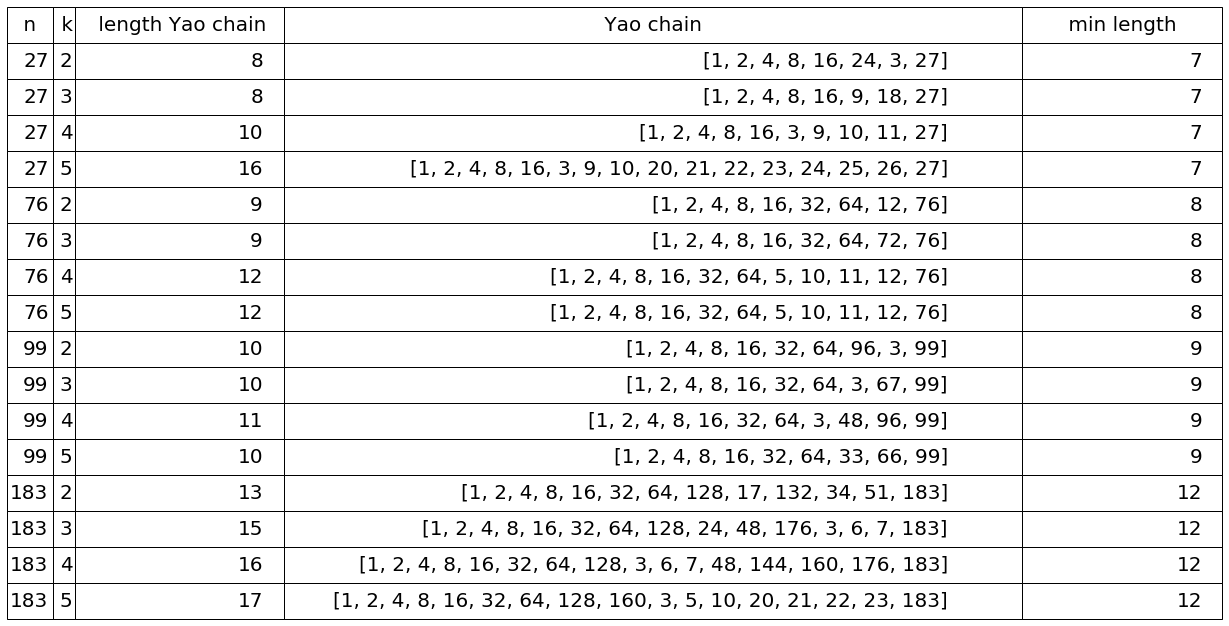

In [1]:
from matplotlib import pyplot as plt

def AlgorithmYao(n, k):
    result_chain = []
    i = 1
    while i < n:
        result_chain.append(i)
        i = i*2
        
    base = 2**k
    pair = []
    tmp = []
    flag = 1
    i = round(floor(log(n, base)), 0)
    z = 0
    d_z = 0
    while n != 0:
        z = n//(base**i)
        d_z = base**i
        if (z > 0):
            for g in pair:
                if (g[0] == z):
                    g[1] += d_z
                    flag = 0
            if (flag):
                pair.append([z, d_z])    #z, d(z)
        n = n%(base**i)
        i = i-1
        flag = 1
        
    length = len(pair)
    pair = sorted(pair)
    
    added_elem = 0
    
    for i in range(length):  
        mul = pair[i][0]
        elem = pair[i][1]
        tmp_elem = elem
        tmp.append([1, elem])
        mul = 2
        while mul <= pair[i][0]:
            if (mul%2 == 1):
                tmp.append([mul,mul*tmp_elem])
                if (pair[i][0]//mul)%2 == 1:
                    mul += 1
                else:
                    mul *= 2
            else:
                tmp.append([mul,mul*tmp_elem])
                if (pair[i][0]//mul)%2 == 1:
                    mul += 1
                else:
                    mul *= 2
                
        added_elem += tmp[-1][1]
        tmp.append([1, added_elem])
                
    pair += tmp
        
    for i in range(len(pair)):
        if pair[i][1] in result_chain:
            continue
        else:
            result_chain.append(pair[i][1])        
            
    return result_chain
        
    
def minimal_length(n):
    return round(floor(log(n, 2)), 0) + bin(n).count('1') - 1

array = [27, 76, 99, 183]

string_of_table = []

for n in array:
    for k in range(2, 6):
        temp = AlgorithmYao(n, k)
        string_of_table.append([n, k, len(temp), temp, minimal_length(n)])
        
header = [' n ', ' k', ' length Yao chain', ' Yao chain ',' min length ']

table = plt.table(cellText=string_of_table, colLabels=header, loc='center')

table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(4)))
table.set_fontsize(20)
table.scale(3, 3) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

**Вывод:** При коэффиценте $k = 2$ аддитивная цепочка, полученная по алгоритму Яо, получается самая оптимальная по длине. Также можно обратить внимание на то, что чем больше коэффициент $k$, тем длиннее получается цепочка, а чем больше $n$, тем больше разрыв между длиной цепочки, построенной по алгоритму Яо, и минимальной длинной цепочки.

# 3. Реализация алгоритма дробления вектора индексов.

**Задание:** Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

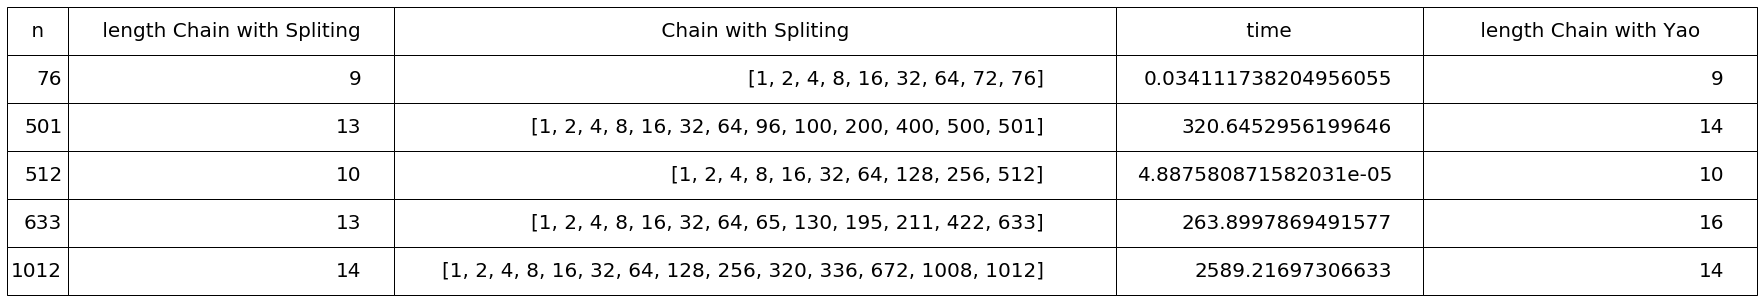

In [17]:
import time



array = [76, 501, 512, 633, 1012]

StringOfTable = []

for n in array:
    startYao = time.time()
    tempYao = AlgorithmYao(n, 2)
    endYao = time.time()
    startSpliting = time.time()
    tempSpliting = AlgorithmSplitingVector(n)
    endSpliting = time.time()
    StringOfTable.append([n, len(tempSpliting), tempSpliting, endSpliting - startSpliting, len(tempYao), endYao - startYao])
        
header = [' n ', ' length Chain with Spliting ', ' Chain with Spliting ', ' time ', ' length Chain with Yao ', ' time ']

table = plt.table(cellText=StringOfTable, colLabels=header, loc='center')

table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(4)))
table.set_fontsize(20)
table.scale(5, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

**Вывод:** Относительно длины полученных аддитивных цепочек метод дробления вектора индексов работает зачастую эффективнее, но если рассматривать затраченное на построение цепочек время, то, бесспорно, выигрывает алгорим Яо, причем в несколько раз. Это может быть объяснено факториальной сложностью. Кроме того, можно заметить, что с увеличением $n$ растет и время, затраченное на построение аддитивной цепочки, только если это не степень двойки.

# 4. Проверка 1 следствия теоремы Брауэра.

**Задание:** Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

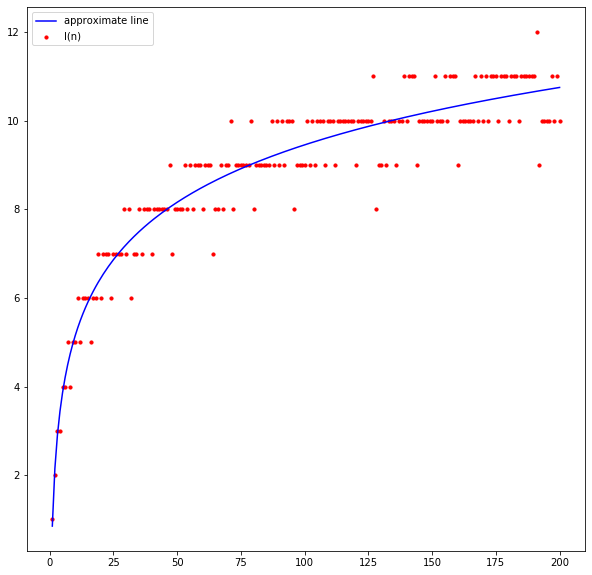

In [1]:
import matplotlib.pyplot as plt
import numpy as np

n = 200
l = []
for i in range(1, n + 1):
    l.append(len(AlgorithmSplitingVector(i)))

    
x = [i for i in range(1, n + 1)]
LogX = [np.log(i) for i in range(1, n + 1)]
SquareLogX = [LogX[i] ** 2 for i in range(n)]
Multiply = [l[i] * LogX[i] for i in range(n)]
CoefB = (n * sum(Multiply) - sum(l) * sum(LogX)) / (n * sum(SquareLogX) - sum(LogX) ** 2)
CoefA = (sum(l) - CoefB * sum(LogX)) / (n - 1)
function = [CoefA + CoefB * LogX[i] for i in range(n)]

plt.figure(figsize = (10, 10))
plt.scatter(x, l, color ='red', s = 10, label = "l(n)")
#plt.scatter(x, [round(floor(log(i, 2)), 0) for i in x], color = 'green', s = 15, label = "lambda(n)")
plt.plot(x, function, color = 'blue', label = "approximate line")
plt.legend()
plt.show()

**Вывод:** Функция $l(n)$ аппроксимируется логарифмической кривой, поэтому можно сделать вывод о ее схожем на бесконечности поведении с $\lambda(n)$, что в свою очередь согласуется с 1 следствием теоремы Брауэра: $lim_{n->\inf}\frac{l(n)}{\lambda(n)} = 1$.

# 5. Проверка гипотезы Шольца-Брауэра.

**Задание:** Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.

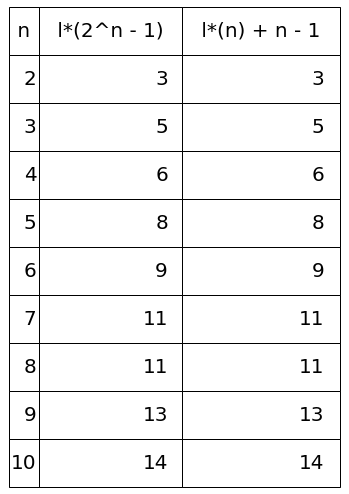

In [7]:
LStarRight = [len(AlgorithmSplitingVector(i)) + i - 1 for i in range(2, 11)]
LStarLeft = [len(AlgorithmSplitingVector(2 ** i - 1)) for i in range(2, 11)]
n = [i for i in range(2, 11)]

StringOfTable = []

for i in n:
    StringOfTable.append([i, LStarRight[i - 2], LStarLeft[i - 2]])
        
header = [' n ', ' l*(2^n - 1) ', ' l*(n) + n - 1 ']

table = plt.table(cellText=StringOfTable, colLabels=header, loc='center')

table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(4)))
table.set_fontsize(20)
table.scale(5, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

**Вывод:** Для всех чисел $ 1 < n \leq 10$ была проверена гипотеза Шольца-Брауэра. Исходя из полученного результата, можно сказать, что она верна.

# Общий вывод:

В ходе работы были изучены методы возведения в степень(бинарный метод и метод множителей), аддитивные цепочки и методы их получения(алгоритм Яо и алгоритм дробления индекосв), кроме того, были проверены следствие из теоремы Брауэра и гипотеза Шольца-Брауэра. Также были получены навыки работы с SageMath и Jupyter Notebook.
